# GridSearchCV for the Vectorizer

In this notebook, we perform a grid search in order to discover the best parameters for the Vectorizer.

In [1]:
%run notebook_utils.py
%run gridsearch_utils.py

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
# set big font in plots
SMALL_SIZE = 16
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [4]:
%cd ..
from langid import WrappedVectorizer, sanitize, np_sanitize
%cd - 

/Users/Lin/git/SwigSpot/language-detection
/Users/Lin/git/SwigSpot/language-detection/notebooks


### data loading

In [5]:
X, y = load_data()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
sms_any_X, sms_any_y = load_sms_any()
X_valid, y_valid = load_validation_data()

# GridSearch for the vectorizer


In [7]:
pipe = Pipeline([
    ('vect', WrappedVectorizer(analyzer='char')),
    ('clf', LogisticRegression())
])

gs_params = {
    'vect__sg_only': (True, False),
    'vect__sanitizer': (None, np_sanitize),
    'vect__max_features': (4000, 6000, 10000),
    'vect__ngram_range': ((1,3), (3,3), (4,4), (3,5)), 
    'vect__use_idf': (True, False),
    'vect__sublinear_tf': (True, False),
}

gs = GridSearchCV(pipe, gs_params, n_jobs=-1, verbose=1)

print("fitting...")
gs.fit(X, y)

fitting...
Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 16.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', WrappedVectorizer(sg_only=False, sanitizer=None, analyzer='char', binary=False, decode_error='strict', dtype=<class 'numpy.int64'>, encoding='utf-8', input='content', lowercase=True, max_df=1.0, max_features=None, min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__sg_only': (True, False), 'vect__sanitizer': (None, <numpy.lib.function_base.vectorize object at 0x112d7c668>), 'vect__max_features': (4000, 6000, 10000), 'vect__ngram_range': ((1, 3), (3, 3), (4, 4), (3, 5)), 'vect__use_idf': (True, False), 'vect__sublinear_tf': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [8]:
print_best_estimator(gs)
print("\n---------\n")
print_scores_csv(gs)


Best score: 0.982
Best parameters set:
	vect__max_features: 10000
	vect__ngram_range: (1, 3)
	vect__sanitizer: <numpy.lib.function_base.vectorize object at 0x112d7c668>
	vect__sg_only: False
	vect__sublinear_tf: True
	vect__use_idf: True

---------

mean, std, vect__max_features,vect__ngram_range,vect__sanitizer,vect__sg_only,vect__sublinear_tf,vect__use_idf
0.939, 0.015, 4000, (1, 3), None, True, True, True
0.938, 0.016, 4000, (1, 3), None, True, True, False
0.939, 0.015, 4000, (1, 3), None, True, False, True
0.937, 0.015, 4000, (1, 3), None, True, False, False
0.980, 0.003, 4000, (1, 3), None, False, True, True
0.977, 0.003, 4000, (1, 3), None, False, True, False
0.980, 0.003, 4000, (1, 3), None, False, False, True
0.976, 0.003, 4000, (1, 3), None, False, False, False
0.939, 0.016, 4000, (1, 3), <numpy.lib.function_base.vectorize object at 0x112d7c668>, True, True, True
0.937, 0.016, 4000, (1, 3), <numpy.lib.function_base.vectorize object at 0x112d7c668>, True, True, False
0.938, 0.

## Evaluating the best estimator found

In [9]:
gs.best_estimator_.named_steps['vect'].get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'sanitizer': <numpy.lib.function_base.vectorize at 0x112d7c668>,
 'sg_only': False,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': True,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [20]:
best_pipe = Pipeline(steps=[
    ('vec', WrappedVectorizer(**gs.best_estimator_.named_steps['vect'].get_params())),
    ('clf', LogisticRegression())
])

best_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vec', WrappedVectorizer(sg_only=False, sanitizer=<numpy.lib.function_base.vectorize object at 0x112d7c668>, analyzer='word', binary=False, decode_error='strict', dtype=<class 'numpy.int64'>, encoding='utf-8', input='content', lowercase=True, max_df=1.0, max_features=10000, min_df=1, ngram_r...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

TEST SET
accuracy: 0.9871

             precision    recall  f1-score   support

         de     0.9863    0.9822    0.9842      1462
         fr     0.9932    0.9925    0.9928      1468
         en     0.9967    0.9883    0.9925      1538
         it     0.9973    0.9960    0.9966      1482
         sg     0.9616    0.9764    0.9689      1438

avg / total     0.9872    0.9871    0.9872      7388



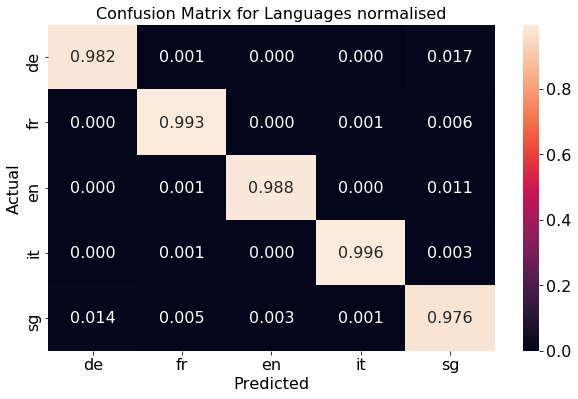

SMS RECALL
total samples    10692
total errors       219 (2.05%)
---------------------------------
languages detected
    de       67
    fr       78
    en       41
    it       33
    sg    10473


VALIDATION SET
accuracy: 0.9851

             precision    recall  f1-score   support

         de     0.9542    0.9897    0.9716      2613
         fr     0.9973    0.9969    0.9971      2613
         en     0.9977    0.9962    0.9969      2613
         it     0.9958    0.9966    0.9962      2613
         sg     0.9813    0.9460    0.9634      2613

avg / total     0.9853    0.9851    0.9850     13065



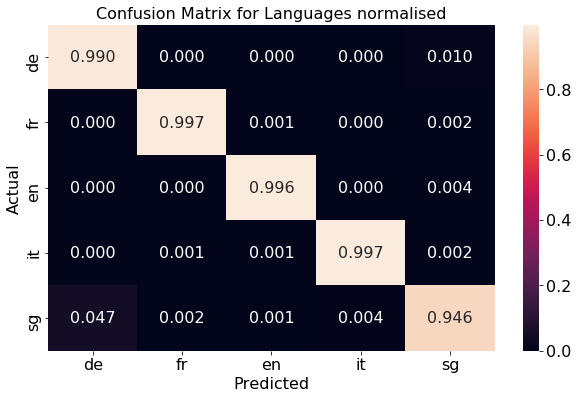

In [21]:
print("TEST SET")
print("========")
y_pred = best_pipe.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)

print("SMS RECALL")
print("==========")

test_recall_with_sms(best_pipe)

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = best_pipe.predict(X_valid)
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True)

In [12]:
print("Testing on SMS any")
print("==================\n")

sms_any_predicted = best_pipe.predict(sms_any_X)
print_results(sms_any_y, sms_any_predicted)
print()
print_errors_per_lang(sms_any_y, sms_any_predicted)
print_sample_errors(sms_any_X, sms_any_y, sms_any_predicted, limit=20)

Testing on SMS any

accuracy: 0.8308

             precision    recall  f1-score   support

         de     1.0000    0.6169    0.7631       201
         fr     0.9891    0.9005    0.9427       201
         en     0.9868    0.7463    0.8499       201
         it     0.9679    0.9005    0.9330       201
         sg     0.5543    0.9900    0.7107       201

avg / total     0.8996    0.8308    0.8399      1005


Errors per language:

  de:   77
  fr:   20
  en:   51
  it:   20
  sg:    2

Sample errors:

real|predicted  <sentence>
--------------------------
  de|sg   hallo kurt, gehts gut? ich bin bis zum 30.11. in sissach. sehen wir uns naechstes wochenende?liebe gruesse papa
  fr|sg   Tu fais koi mÆtnÅ?
  de|sg   Hallo Julian habe jetzt 2 Dosier Weingut abgegeben. Gruss Maat
  de|sg   habe vorher schule... vielleicht 10.05, wenn ich pressiere, geht das?
  fr|sg   Dè kon rentre-ver 6h. Biz
  en|sg   Hey we're gonna see us tomorrow, right?not next week?lilu
  de|sg   Bin jetzt zuHause. LG

# Understanding the errors better

In [13]:
errors_idx = np.argwhere(sms_any_y != sms_any_predicted).flatten()

In [14]:
print("English sentences taken for Swiss German:")
print("=========================================\n")
for i in errors_idx: 
    if sms_any_y[i] == 2:
        print(sms_any_X[i])

English sentences taken for Swiss German:

Babe...babe...i'm back again.i tell you i'm back again.i'm ba-hack again.babe...
Finished today! When do i start tomorrow pls.?
Wow! You're speaking English? Have a nice time! G,e
Sweetheart, me too I miss u. Let me get up, shower en buy som bread. I call u after, okay. Am still dozin in bed. You are sweet. xxx
Charlot angel, am still @mymother's place where we had dinner w my parents. Miss u, xxx sss
Gd ngt my love, am so tired. Sleep well. kisss
Guess what? few min. late 8-|...sorry
M thinking F U day n N day out. C u.
Hope u r sleeping good! I go dreaming in u'r arms so deep, love u priska <3 xxx
I am busy right now. I'll call you back later.tiziano
Hi celine. Monday 12.15 john
Very true... :-) u coming 2 pala 2nite?
I just kiss you betwern your legs :-) - CU soon...
14. November! Love u:-*
Hey kiwi, u here soon?
Where R U?
S T A R T xxxxxxxxxxxxxxxxxxxx@yyy.ch
c u soon babes x's
How about lunch next week?B-)
Aiii äm wot ai ääm aiäm mai oon

# Using probabilities

In [15]:
valid_proba = best_pipe.predict_proba(X_valid)
valid_bin = np.array(y_valid == 4, dtype=int)

In [16]:
print("Actual Swiss German: ", valid_bin.sum())
print("Predicted Swiss German using probability filter: ")
for proba in [0.5, 0.7, 0.8, 0.85, 0.9, 0.95]:
    print("  p >= %d: %d" % (proba * 100, np.array(valid_proba[:,4] >= proba, dtype=int).sum()))

Actual Swiss German:  2613
Predicted Swiss German using probability filter: 
  p >= 50: 2475
  p >= 70: 2289
  p >= 80: 2087
  p >= 85: 1863
  p >= 90: 1475
  p >= 95: 718


accuracy: 0.9597

             precision    recall  f1-score   support

     Not SG     0.9521    1.0000    0.9755     10452
         SG     1.0000    0.7987    0.8881      2613

avg / total     0.9617    0.9597    0.9580     13065



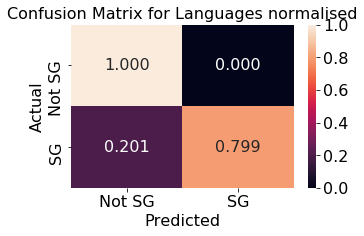

In [17]:
labels = ['Not SG', 'SG']
proba_pred = np.array(valid_proba[:,4] >= 0.8, dtype=int)
print_results(valid_bin, proba_pred, labels=labels)
plot_confusion_matrix(valid_bin, proba_pred, normalised=True, labels=labels, figsize=(5,3))

In [18]:
min_proba = 0.85
proba_pred = np.array(valid_proba[:,4] >= min_proba, dtype=int)
print("Sample of Swiss German sentences misclassified (min proba=%.2f):\n" % min_proba)
print("R|P  proba sentence")
print("-------------------")
err_idx = np.where(valid_bin != proba_pred)[0]
for i in random.sample(err_idx.tolist(), 20):
    print("%d|%d (%.2f) %s" % (valid_bin[i], proba_pred[i], valid_proba[i, 4], X_valid[i]))

Sample of Swiss German sentences misclassified (min proba=0.85):

R|P  proba sentence
-------------------
1|0 (0.36) No froggt äär dää: daarf di öbbis haiggels frooge!
1|0 (0.20) Mitteleuropa, in Wäldern, tagsüber vor allem unter Holz.
1|0 (0.74) Fachärztin FMH für Allgemeine Innere Medizin info@diehausaerztinnen.ch Prof.
1|0 (0.81) Merci vyylmool fir dä lessigi Ufftritt an unserem Galaoobe, 40 Joor Gyzgnäbber Waagis 1973.
1|0 (0.83) Eg liebe die zwöi, si si eifach super.
1|0 (0.84) Ameldig und bekanntgab vom Ort demnächscht:-) Jo wieder uf und agleit, und trockenen fusses zur arbet cho?
1|0 (0.05) Anlässlich: Abschlussveranstaltung des Projektes Raum+ Thurgau.
1|0 (0.81) Ihr händ ihn einfach i eui Fründschaft ufgnoh und ich ha gmerkt wie guet ihm das tuet.
1|0 (0.27) Ausflüge und Freizeittipps für die ganze Familie..
1|0 (0.05) Gerlinde Huber-Rebenich LV 6/8: Übung zur Vorlesung: Geschichte der lateinischen Sprache: Antike bis Humanismus.
1|0 (0.81) Viu chani derzue eigentlech gar nid

Average precision-recall score: 0.77


Text(0.5,1,'2-class Precision-Recall curve: AP=0.77')

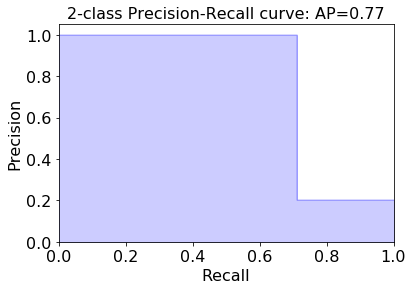

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score
average_precision = average_precision_score(valid_bin, proba_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
precision, recall, _ = precision_recall_curve(valid_bin, proba_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))